In [157]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_pyber = pd.merge(city_df, ride_df, on="city", how="outer")

# Display the data table for preview
merge_pyber.head(10)



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [158]:
data_df = merge_pyber[["city", "driver_count", "type", "fare", "ride_id"]]


## Bubble Plot of Ride Sharing Data

In [159]:
data_r = data_df.loc[data_df["type"] == "Rural", :]
data_u = data_df.loc[data_df["type"] == "Urban", :]
data_s = data_df.loc[data_df["type"] == "Suburban", :]


In [160]:
data_r = data_r.groupby("city")
data_u = data_u.groupby("city")
data_s = data_s.groupby("city")

In [161]:
data_r_fare = data_r["fare"].mean()
data_r_rides = data_r["ride_id"].count()
data_r_drivers = data_r["driver_count"].mean()

data_u_fare = data_u["fare"].mean()
data_u_rides = data_u["ride_id"].count()
data_u_drivers = data_u["driver_count"].mean()

data_s_fare = data_s["fare"].mean()
data_s_rides = data_s["ride_id"].count()
data_s_drivers = data_s["driver_count"].mean()

TypeError: 'str' object is not callable

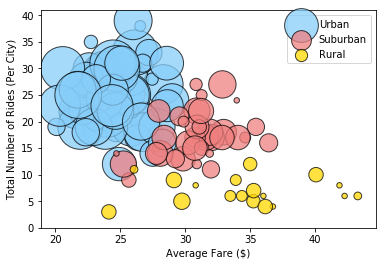

In [162]:
plt.scatter(data_u_fare, data_u_rides, data_u_drivers*30, marker="o", alpha = 0.75, facecolors="lightskyblue", edgecolors="black")
plt.scatter(data_s_fare, data_s_rides, data_s_drivers*30, marker="o", alpha = 0.75, facecolors="lightcoral", edgecolors="black")
plt.scatter(data_r_fare, data_r_rides, data_r_drivers*30, marker="o", alpha = 0.75, facecolors="gold", edgecolors="black")


plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.legend(["Urban", "Suburban", "Rural"], loc = 'best')
plt.title("Pyber Ride Sharing Data (2016)")

plt.show()

Here we see that fares in urban cities tend to be lower than in rural and suburban cities.

## Total Fares by City Type

In [146]:
type_data_all = data_df[["type", "fare", "ride_id"]]
rural_data = type_data_all.loc[type_data_all["type"] == "Rural", :]
urban_data = type_data_all.loc[type_data_all["type"] == "Urban", :]
suburb_data = type_data_all.loc[type_data_all["type"] == "Suburban", :]

In [147]:
#Number of drivers
r_drivers = pd.DataFrame(data_r_drivers)
u_drivers = pd.DataFrame(data_u_drivers)
s_drivers = pd.DataFrame(data_s_drivers)

rural_dvr = r_drivers["driver_count"].sum()
urban_dvr = u_drivers["driver_count"].sum()
suburb_dvr = s_drivers["driver_count"].sum()

#Number of rides
rural = pd.DataFrame(rural_data)
urban = pd.DataFrame(urban_data)
suburb = pd.DataFrame(suburb_data)

rural_rides = rural["ride_id"].count()
urban_rides = urban["ride_id"].count()
suburb_rides = suburb["ride_id"].count()

#Total fare

rural_fares = rural["fare"].sum()
urban_fares = urban["fare"].sum()
suburb_fares = suburb["fare"].sum()



In [148]:
fares = [rural_fares, urban_fares, suburb_fares]
rides = [rural_rides, urban_rides, suburb_rides]
drivers = [rural_dvr, urban_dvr, suburb_dvr]
types = ["Rural", "Urban", "Suburban"]
colors = ["gold", "lightcoral", "lightskyblue"]

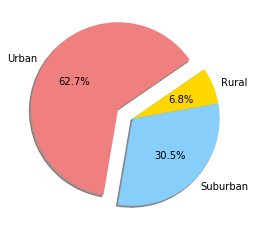

In [149]:
# Calculate Type Percents
explode = (0,0.2,0)
plt.pie(fares, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=10)

plt.title = "% of Total Fares by City Type"
plt.show()

We can clearly see that while, as seen in the previous scatter plot, fares in urban cities tend to be lower than in rural or suburban cities, those fares make up over 62% of the total fares charged.

## Total Rides by City Type

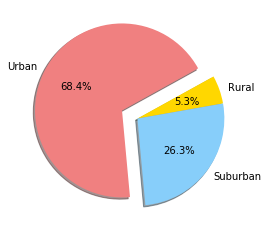

In [153]:
# Calculate Ride Percents
explode = (0,0.2,0)
plt.pie(rides, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=10)

plt.title =("% of Total Rides by City Type")
plt.show()

We see that the amount of rides taken in urban cities is significantly more than even rural and suburban rides combined.

## Total Drivers by City Type

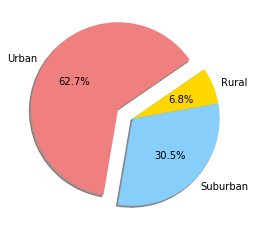

In [137]:
# Calculate Driver Percents
explode = (0,0.2,0)
plt.pie(fares, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=10)

plt.title = "% of Total Driver by City Type"
plt.show()

Again we see that the amount of drivers in urban areas is significantly more than even rural and suburban drivers combined.

It's possible that higher number of urban drivers is what leads to lower fares in urban cities.

It's also possible that more rides are taken in urban areas because the lower fares are more affordable, so it might be beneficial to focus on driver recruitment in suburban and rural areas.  

It might be benifical to look at the number of unique rides given by individual drivers in these locations, as well as the average length of rides in the different city types.